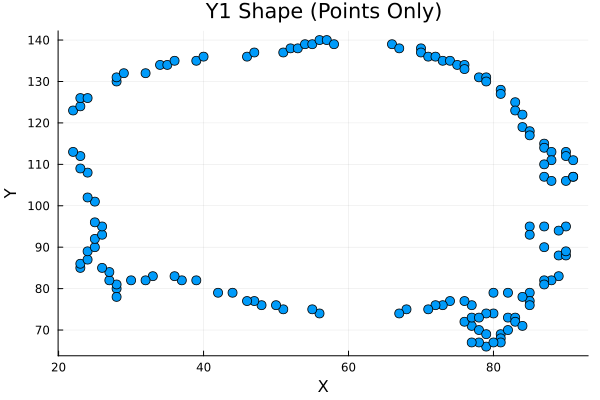

In [23]:
using Plots

# Define the coordinates
x = [79, 78, 77, 77, 76, 77, 77, 76, 74, 73, 72, 71, 68, 67, 56, 55, 51, 50, 48, 47, 46, 44, 42, 39, 37, 36, 33, 32, 30, 28, 28, 28, 27, 27, 26, 23, 23, 24, 24, 25, 25, 26, 26, 25, 25, 24, 24, 23, 23, 22, 22, 23, 23, 24, 28, 28, 29, 32, 34, 35, 36, 39, 40, 46, 47, 51, 52, 53, 54, 55, 56, 57, 58, 66, 67, 70, 70, 71, 72, 73, 74, 75, 76, 76, 78, 79, 79, 81, 81, 83, 83, 84, 84, 85, 85, 87, 87, 88, 90, 90, 91, 88, 87, 87, 88, 90, 91, 91, 90, 89, 87, 85, 85, 87, 89, 90, 90, 89, 88, 87, 87, 85, 85, 85, 84, 82, 80, 80, 79, 78, 78, 79, 81, 82, 82, 83, 83, 84, 81, 81, 80]
y = [66, 67, 67, 71, 72, 73, 76, 77, 77, 76, 76, 75, 75, 74, 74, 75, 75, 76, 76, 77, 77, 79, 79, 82, 82, 83, 83, 82, 82, 80, 78, 81, 82, 84, 85, 85, 86, 87, 89, 90, 92, 93, 95, 96, 101, 102, 108, 109, 112, 113, 123, 124, 126, 126, 130, 131, 132, 132, 134, 134, 135, 135, 136, 136, 137, 137, 138, 138, 139, 139, 140, 140, 139, 139, 138, 138, 137, 136, 136, 135, 135, 134, 134, 133, 131, 131, 130, 128, 127, 125, 123, 122, 119, 118, 117, 115, 114, 113, 113, 112, 111, 111, 110, 107, 106, 106, 107, 107, 95, 94, 95, 95, 93, 90, 88, 88, 89, 83, 82, 82, 81, 79, 77, 76, 78, 79, 79, 74, 74, 73, 70, 69, 69, 70, 73, 73, 72, 71, 68, 67, 67]

# Plot only the points
scatter(x, y, label = false, title = "Y1 Shape (Points Only)", xlabel = "X", ylabel = "Y", markersize=5)


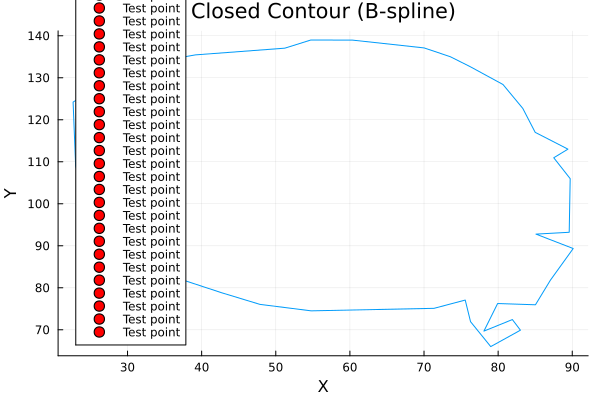

Test point: (160, 100)
Is the point inside the contour? false


In [8]:
using Plots
using Dierckx  # For B-spline interpolation
using Random

# Define the coordinates and make them closed by appending the first point to the end
x = [79, 78, 77, 77, 76, 77, 77, 76, 74, 73, 72, 71, 68, 67, 56, 55, 51, 50, 48, 47, 46, 44, 42, 39, 37, 36, 33, 32, 30, 28, 28, 28, 27, 27, 26, 23, 23, 24, 24, 25, 25, 26, 26, 25, 25, 24, 24, 23, 23, 22, 22, 23, 23, 24, 28, 28, 29, 32, 34, 35, 36, 39, 40, 46, 47, 51, 52, 53, 54, 55, 56, 57, 58, 66, 67, 70, 70, 71, 72, 73, 74, 75, 76, 76, 78, 79, 79, 81, 81, 83, 83, 84, 84, 85, 85, 87, 87, 88, 90, 90, 91, 88, 87, 87, 88, 90, 91, 91, 90, 89, 87, 85, 85, 87, 89, 90, 90, 89, 88, 87, 87, 85, 85, 85, 84, 82, 80, 80, 79, 78, 78, 79, 81, 82, 82, 83, 83, 84, 81, 81, 80, 79]
y = [66, 67, 67, 71, 72, 73, 76, 77, 77, 76, 76, 75, 75, 74, 74, 75, 75, 76, 76, 77, 77, 79, 79, 82, 82, 83, 83, 82, 82, 80, 78, 81, 82, 84, 85, 85, 86, 87, 89, 90, 92, 93, 95, 96, 101, 102, 108, 109, 112, 113, 123, 124, 126, 126, 130, 131, 132, 132, 134, 134, 135, 135, 136, 136, 137, 137, 138, 138, 139, 139, 140, 140, 139, 139, 138, 138, 137, 136, 136, 135, 135, 134, 134, 133, 131, 131, 130, 128, 127, 125, 123, 122, 119, 118, 117, 115, 114, 113, 113, 112, 111, 111, 110, 107, 106, 106, 107, 107, 95, 94, 95, 95, 93, 90, 88, 88, 89, 83, 82, 82, 81, 79, 77, 76, 78, 79, 79, 74, 74, 73, 70, 69, 69, 70, 73, 73, 72, 71, 68, 67, 67, 66]

# Create a B-spline interpolation for the points using Dierckx.jl
spl_x = Spline1D(collect(1:length(x)), x, k=3)  # Cubic B-spline for x
spl_y = Spline1D(collect(1:length(y)), y, k=3)  # Cubic B-spline for y

# Define a finer grid for interpolation
fine_t = range(1, length(x), length=40)

# Interpolated values
smooth_x = spl_x.(fine_t)
smooth_y = spl_y.(fine_t)

# Plot the smooth curve using splines only (without scatter points)
plt = plot(smooth_x, smooth_y, label = false, title = "Closed Contour (B-spline)", xlabel = "X", ylabel = "Y")




# Test point to display
test_point = (160, 100)

# Determine if the test point is inside the contour
is_inside = point_in_polygon(test_point[1], test_point[2], smooth_x, smooth_y)

# Plot the test point in green if inside, red if outside
scatter!(plt, test_point[1], test_point[2], color=is_inside ? :green : :red, label="Test point")

# Display the plot
display(plt)

# Print result
println("Test point: ", test_point)
println("Is the point inside the contour? ", is_inside)

Failed to place circle 46 after 1000 attempts
Failed to place circle 47 after 1000 attempts
Failed to place circle 49 after 1000 attempts
Failed to place circle 51 after 1000 attempts
Failed to place circle 52 after 1000 attempts
Failed to place circle 53 after 1000 attempts
Failed to place circle 55 after 1000 attempts
Failed to place circle 56 after 1000 attempts
Failed to place circle 57 after 1000 attempts
Failed to place circle 58 after 1000 attempts
Failed to place circle 59 after 1000 attempts
Failed to place circle 61 after 1000 attempts
Failed to place circle 62 after 1000 attempts
Failed to place circle 63 after 1000 attempts
Failed to place circle 64 after 1000 attempts
Failed to place circle 66 after 1000 attempts
Failed to place circle 67 after 1000 attempts
Failed to place circle 69 after 1000 attempts
Failed to place circle 70 after 1000 attempts
Failed to place circle 71 after 1000 attempts
Failed to place circle 72 after 1000 attempts
Failed to place circle 73 after 10

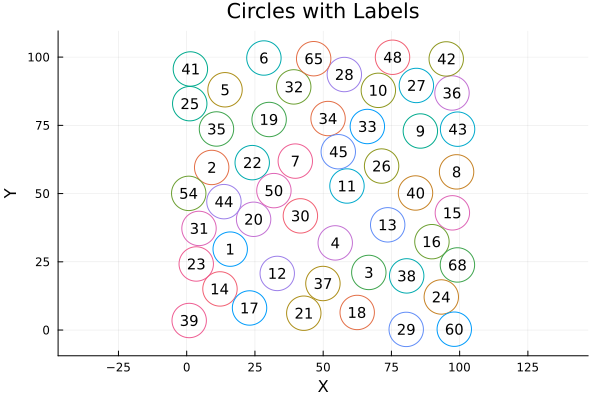

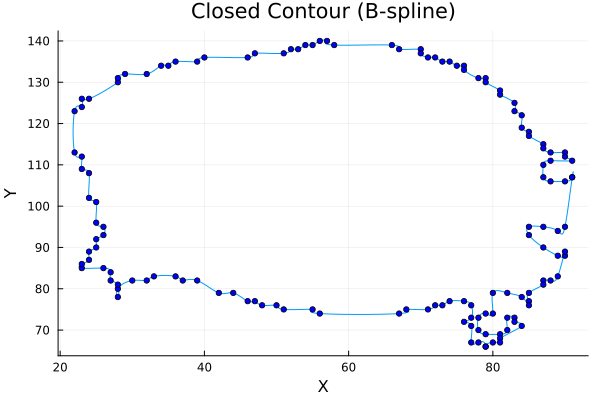

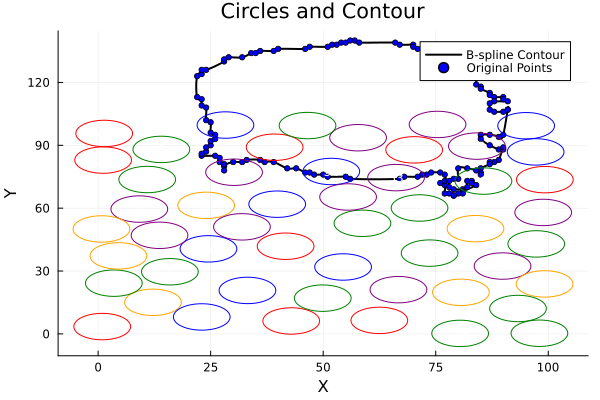

In [11]:
using Plots
using Dierckx  # For B-spline interpolation
using Random

# Define the coordinates and make them closed by appending the first point to the end
x = [79, 78, 77, 77, 76, 77, 77, 76, 74, 73, 72, 71, 68, 67, 56, 55, 51, 50, 48, 47, 46, 44, 42, 39, 37, 36, 33, 32, 30, 28, 28, 28, 27, 27, 26, 23, 23, 24, 24, 25, 25, 26, 26, 25, 25, 24, 24, 23, 23, 22, 22, 23, 23, 24, 28, 28, 29, 32, 34, 35, 36, 39, 40, 46, 47, 51, 52, 53, 54, 55, 56, 57, 58, 66, 67, 70, 70, 71, 72, 73, 74, 75, 76, 76, 78, 79, 79, 81, 81, 83, 83, 84, 84, 85, 85, 87, 87, 88, 90, 90, 91, 88, 87, 87, 88, 90, 91, 91, 90, 89, 87, 85, 85, 87, 89, 90, 90, 89, 88, 87, 87, 85, 85, 85, 84, 82, 80, 80, 79, 78, 78, 79, 81, 82, 82, 83, 83, 84, 81, 81, 80, 79]
y = [66, 67, 67, 71, 72, 73, 76, 77, 77, 76, 76, 75, 75, 74, 74, 75, 75, 76, 76, 77, 77, 79, 79, 82, 82, 83, 83, 82, 82, 80, 78, 81, 82, 84, 85, 85, 86, 87, 89, 90, 92, 93, 95, 96, 101, 102, 108, 109, 112, 113, 123, 124, 126, 126, 130, 131, 132, 132, 134, 134, 135, 135, 136, 136, 137, 137, 138, 138, 139, 139, 140, 140, 139, 139, 138, 138, 137, 136, 136, 135, 135, 134, 134, 133, 131, 131, 130, 128, 127, 125, 123, 122, 119, 118, 117, 115, 114, 113, 113, 112, 111, 111, 110, 107, 106, 106, 107, 107, 95, 94, 95, 95, 93, 90, 88, 88, 89, 83, 82, 82, 81, 79, 77, 76, 78, 79, 79, 74, 74, 73, 70, 69, 69, 70, 73, 73, 72, 71, 68, 67, 67, 66]

# Create a B-spline interpolation for the points using Dierckx.jl
spl_x = Spline1D(collect(1:length(x)), x, k=3)  # Cubic B-spline for x
spl_y = Spline1D(collect(1:length(y)), y, k=3)  # Cubic B-spline for y

# Define a finer grid for interpolation
fine_t = range(1, length(x), length=1000)

# Interpolated values
smooth_x = spl_x.(fine_t)
smooth_y = spl_y.(fine_t)

# Implement point-in-polygon test (Ray-casting algorithm)
function point_in_polygon(px, py, x, y)
    n = length(x)
    inside = false
    j = n
    for i in 1:n
        if ((y[i] > py) != (y[j] > py)) &&
           (px < (x[j] - x[i]) * (py - y[i]) / (y[j] - y[i]) + x[i])
            inside = !inside
        end
        j = i
    end
    return inside
end

# Define a function to check if two circles overlap
function circles_overlap(x1, y1, x2, y2, r1, r2)
    dist = sqrt((x2 - x1)^2 + (y2 - y1)^2)
    return dist < (r1 + r2)
end

function plot_points_and_contour(x, y, smooth_x, smooth_y)
    plt = plot(smooth_x, smooth_y, label=false, title="Closed Contour (B-spline)", xlabel="X", ylabel="Y")
    scatter!(plt, x, y, label=false, markersize=3, legend=false, color=:blue)
    display(plt)
end

function make_circles(num_circles; radius=6.3, x_min=0.0, x_max=100.0, y_min=0.0, y_max=100.0)
    circles = []
    max_attempts = 1000  # Max attempts to find a non-overlapping position
    
    for i in 1:num_circles
        attempts = 0
        while attempts < max_attempts
            x = rand() * (x_max - x_min) + x_min  # Random x in [x_min, x_max]
            y = rand() * (y_max - y_min) + y_min  # Random y in [y_min, y_max]
            overlap = false
            
            # Check if this circle overlaps with any existing circles
            for (cx, cy, cr, _) in circles
                if circles_overlap(x, y, cx, cy, radius, cr)
                    overlap = true
                    break
                end
            end
            
            if !overlap
                # Store the circle's (x, y), radius, and label (i)
                push!(circles, (x, y, radius, i))
                break
            end
            
            attempts += 1
        end
        
        # If no non-overlapping position found after max attempts, skip this circle
        if attempts == max_attempts
            println("Failed to place circle $i after $max_attempts attempts")
        end
    end
    
    return circles  # Return an array of circles
end

function plot_circles(circles)
    # Set up the plot with equal aspect ratio
    plot(aspect_ratio=:equal, legend=false, xlabel="X", ylabel="Y", title="Circles with Labels")
    
    # Generate the circle as a parametric shape
    θ = range(0, stop=2π, length=100)
    
    # Iterate over each circle and plot it
    for (x, y, radius, label) in circles
        x_circle = x .+ radius .* cos.(θ)
        y_circle = y .+ radius .* sin.(θ)
        
        # Plot the circle and annotate it with its label
        plot!(x_circle, y_circle, label=false)
        annotate!(x, y, text(string(label), :center, 10, :black))
    end
    
    display(plot!())
end


# Example usage with defined bounds:
num_circles = 100
x_min, x_max = 0.0, 100.0
y_min, y_max = 0.0, 100.0
circles= make_circles(num_circles, x_min=x_min, x_max=x_max, y_min=y_min, y_max=y_max)



plot_circles(circles)
plot_points_and_contour(x, y, smooth_x, smooth_y)



Failed to place circle 93 after 1000 attempts
Failed to place circle 94 after 1000 attempts
Failed to place circle 97 after 1000 attempts
Failed to place circle 100 after 1000 attempts


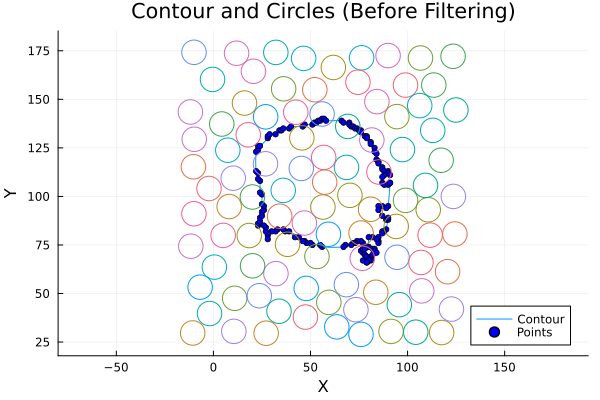

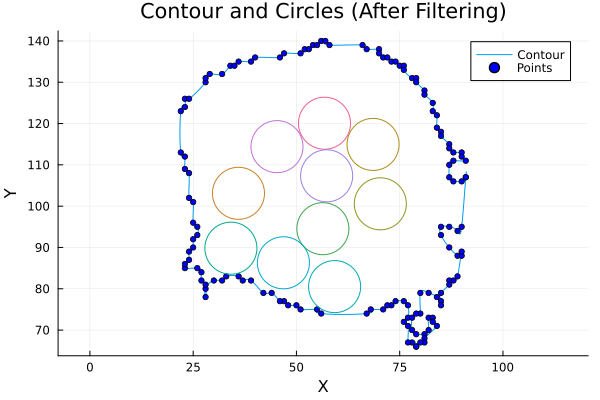

In [10]:
using Plots
using Dierckx  # For B-spline interpolation
using Random

# Define the coordinates and make them closed by appending the first point to the end
x = [79, 78, 77, 77, 76, 77, 77, 76, 74, 73, 72, 71, 68, 67, 56, 55, 51, 50, 48, 47, 46, 44, 42, 39, 37, 36, 33, 32, 30, 28, 28, 28, 27, 27, 26, 23, 23, 24, 24, 25, 25, 26, 26, 25, 25, 24, 24, 23, 23, 22, 22, 23, 23, 24, 28, 28, 29, 32, 34, 35, 36, 39, 40, 46, 47, 51, 52, 53, 54, 55, 56, 57, 58, 66, 67, 70, 70, 71, 72, 73, 74, 75, 76, 76, 78, 79, 79, 81, 81, 83, 83, 84, 84, 85, 85, 87, 87, 88, 90, 90, 91, 88, 87, 87, 88, 90, 91, 91, 90, 89, 87, 85, 85, 87, 89, 90, 90, 89, 88, 87, 87, 85, 85, 85, 84, 82, 80, 80, 79, 78, 78, 79, 81, 82, 82, 83, 83, 84, 81, 81, 80, 79]
y = [66, 67, 67, 71, 72, 73, 76, 77, 77, 76, 76, 75, 75, 74, 74, 75, 75, 76, 76, 77, 77, 79, 79, 82, 82, 83, 83, 82, 82, 80, 78, 81, 82, 84, 85, 85, 86, 87, 89, 90, 92, 93, 95, 96, 101, 102, 108, 109, 112, 113, 123, 124, 126, 126, 130, 131, 132, 132, 134, 134, 135, 135, 136, 136, 137, 137, 138, 138, 139, 139, 140, 140, 139, 139, 138, 138, 137, 136, 136, 135, 135, 134, 134, 133, 131, 131, 130, 128, 127, 125, 123, 122, 119, 118, 117, 115, 114, 113, 113, 112, 111, 111, 110, 107, 106, 106, 107, 107, 95, 94, 95, 95, 93, 90, 88, 88, 89, 83, 82, 82, 81, 79, 77, 76, 78, 79, 79, 74, 74, 73, 70, 69, 69, 70, 73, 73, 72, 71, 68, 67, 67, 66]

# Create a B-spline interpolation for the points using Dierckx.jl
spl_x = Spline1D(collect(1:length(x)), x, k=3)  # Cubic B-spline for x
spl_y = Spline1D(collect(1:length(y)), y, k=3)  # Cubic B-spline for y

# Define a finer grid for interpolation
fine_t = range(1, length(x), length=1000)

# Interpolated values
smooth_x = spl_x.(fine_t)
smooth_y = spl_y.(fine_t)

# Ray-casting algorithm to check if a point is inside a polygon
function point_in_polygon(px, py, x, y)
    n = length(x)
    inside = false
    j = n
    for i in 1:n
        if ((y[i] > py) != (y[j] > py)) &&
           (px < (x[j] - x[i]) * (py - y[i]) / (y[j] - y[i]) + x[i])
            inside = !inside
        end
        j = i
    end
    return inside
end

# Function to check if the circle is completely inside the contour
function circle_in_polygon(cx, cy, radius, polygon_x, polygon_y)
    num_samples = 100
    θ = range(0, stop=2π, length=num_samples)

    for angle in θ
        px = cx + radius * cos(angle)
        py = cy + radius * sin(angle)
        if !point_in_polygon(px, py, polygon_x, polygon_y)
            return false
        end
    end
    return true
end

# Define a function to double the playground based on min/max of the contour
function set_playground(smooth_x, smooth_y)
    x_min, x_max = extrema(smooth_x)
    y_min, y_max = extrema(smooth_y)
    width = x_max - x_min
    height = y_max - y_min
    return x_min - 0.5 * width, x_max + 0.5 * width, y_min - 0.5 * height, y_max + 0.5 * height
end

x_min, x_max, y_min, y_max = set_playground(smooth_x, smooth_y)

# Make circles within the defined playground
function make_circles(num_circles; radius=6.3, x_min=0.0, x_max=100.0, y_min=0.0, y_max=100.0)
    circles = []
    max_attempts = 1000  # Max attempts to find a non-overlapping position
    
    for i in 1:num_circles
        attempts = 0
        while attempts < max_attempts
            x = rand() * (x_max - x_min) + x_min  # Random x in [x_min, x_max]
            y = rand() * (y_max - y_min) + y_min  # Random y in [y_min, y_max]
            overlap = false
            
            # Check if this circle overlaps with any existing circles
            for (cx, cy, cr, _) in circles
                if sqrt((cx - x)^2 + (cy - y)^2) < (cr + radius)
                    overlap = true
                    break
                end
            end
            
            if !overlap
                # Store the circle's (x, y), radius, and label (i)
                push!(circles, (x, y, radius, i))
                break
            end
            
            attempts += 1
        end
        
        # If no non-overlapping position found after max attempts, skip this circle
        if attempts == max_attempts
            println("Failed to place circle $i after $max_attempts attempts")
        end
    end
    
    return circles  # Return an array of circles
end

# Filter circles that are completely inside the contour
function filter_circles_inside_contour(circles, smooth_x, smooth_y)
    return [circle for circle in circles if circle_in_polygon(circle[1], circle[2], circle[3], smooth_x, smooth_y)]
end

# Generate and filter circles
num_circles = 100
circles = make_circles(num_circles, x_min=x_min, x_max=x_max, y_min=y_min, y_max=y_max)
circles_inside = filter_circles_inside_contour(circles, smooth_x, smooth_y)

# Plot everything together (Before filtering)
function plot_all_before(x, y, smooth_x, smooth_y, circles)
    plt = plot(aspect_ratio=:equal, xlabel="X", ylabel="Y", title="Contour and Circles (Before Filtering)")
    plot!(plt, smooth_x, smooth_y, label="Contour")
    scatter!(plt, x, y, label="Points", markersize=3, color=:blue)
    
    # Plot circles before filtering
    θ = range(0, stop=2π, length=100)
    for (cx, cy, radius, label) in circles
        x_circle = cx .+ radius .* cos.(θ)
        y_circle = cy .+ radius .* sin.(θ)
        plot!(plt, x_circle, y_circle, label=false)
    end
    
    display(plt)
end

# Plot everything together (After filtering)
function plot_all_after(x, y, smooth_x, smooth_y, circles)
    plt = plot(aspect_ratio=:equal, xlabel="X", ylabel="Y", title="Contour and Circles (After Filtering)")
    plot!(plt, smooth_x, smooth_y, label="Contour")
    scatter!(plt, x, y, label="Points", markersize=3, color=:blue)
    
    # Plot circles after filtering
    θ = range(0, stop=2π, length=100)
    for (cx, cy, radius, label) in circles
        x_circle = cx .+ radius .* cos.(θ)
        y_circle = cy .+ radius .* sin.(θ)
        plot!(plt, x_circle, y_circle, label=false)
    end
    
    display(plt)
end

# Use the filtered circles inside the contour
plot_all_before(x, y, smooth_x, smooth_y, circles)  # Before filtering
plot_all_after(x, y, smooth_x, smooth_y, circles_inside)  # After filtering
